
# Motion of a Pendulum Without Drag

### The Euler Method Versus The Euler-Cromer Method

Computational Physics

Micheal Jones

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math, Latex

%matplotlib inline

In [2]:
theta = []
theta0 = 0.1
g = 10.0
L = 1.0
omega0 = 0.0
period = 2*np.pi*np.sqrt(L/g)
dt = 0.01
t = np.arange(0,10*period,dt)
"""
the arange command is used to set up a time array here, notice t is not previously defined. 
the parameters of the arange command refer to start stop and step. 
the len command yeilds the number of terms in the array
"""
print("Period=",period,"seconds")


Period= 1.98691765316 seconds


$$ \theta_0 \ = \ 0.1 \ radians $$
$$ \omega_0 \ = \ 0.0 $$
$$ g \ = \ 10.0 \ m/s^2 $$
$$ L \ = \ 1.0 \ m $$
$$ dt \ = \ 0.01 \ s $$
$$ Period = T \ \tilde= \ 1.987 \ s $$  

In [3]:
angle_E = np.zeros(len(t))
angVel_E = np.zeros(len(t))

"""
this handy command creates an array of zeros for any defined term. 
how many zeros is the parameter, here it is equal to the number of time values which is defined in steps
"""

angle_E[0] = theta0
angVel_E[0] = omega0

"""
this is defining the zero-th (first) element of the array being defined
I've defined these initial values globally so that the code is easier to manipulate, 
without having to find where I've either appended an initial value in the code 
or assigned one to an empty array with numpy. 
"""

print("Number of terms assigned to array of times: ", len(t))

Number of terms assigned to array of times:  1987


In [4]:
"""
In this cell I will define my step functions for the Euler Method.
"""

def thetaStep(theta,omega,dt):
    return(theta + omega*dt)

def omegaStep(theta, omega, dt, g=10.0, L=1.0):
    return(omega -g*theta*dt/L)

$$ \theta_{step} \ = \ \theta + \omega \ dt $$


$$ \omega_{step} \ = \ \omega - \frac{g \ \theta \ dt}{L} $$

In [5]:
for i in range(1,len(t)):
    angle_E[i] = thetaStep(angle_E[i-1], angVel_E[i-1], dt) #Euler Method
    angVel_E[i] = omegaStep(angle_E[i-1], angVel_E[i-1], dt)

"""
This rule identifies the values which will be associated with the specified index in each array.
"""

print("Angle Array: ", angle_E)
print("Angular Velocity Array: ", angVel_E)

Angle Array:  [ 0.1         0.1         0.0999     ...,  0.26780461  0.26876709
  0.26946176]
Angular Velocity Array:  [ 0.         -0.01       -0.02       ...,  0.0962475   0.06946704
  0.04259033]


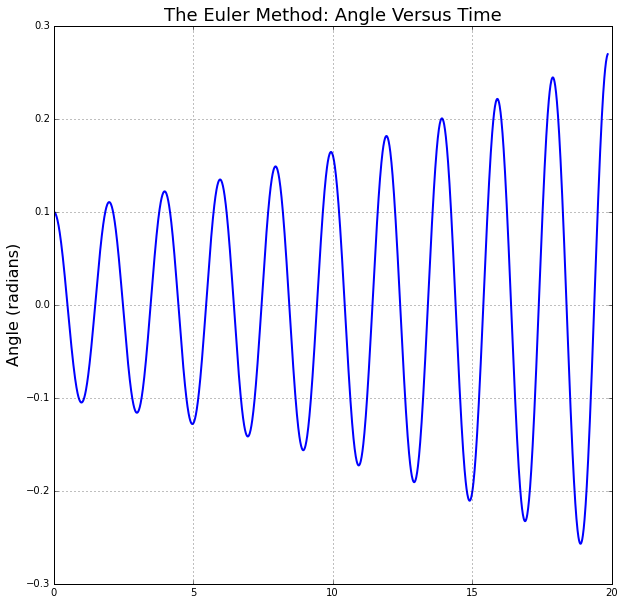

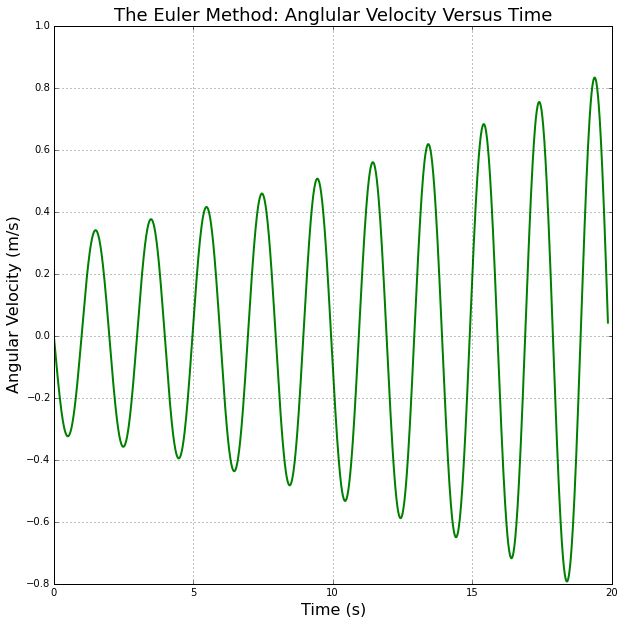

In [6]:
"""
Now that my arrays are full of the appropriate values, I can plot my data against time.
"""

plt.figure(0)
plt.figure(figsize=(10,10))
plt.plot(t, angle_E, linewidth= 2.0)
plt.title('The Euler Method: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
#plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(t,angVel_E, color='green', linewidth= 2.0)
plt.title('The Euler Method: Anglular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.show ()

The data which has resulted from the Euler method of referencing the initial values to build an array is clearly incorrect here. Because the pendulum in the problem is ideal, our results shoul not reflect any variation in the period of the pendulum; there are no external forces acting on the object and therefore energy should be conserved and the motion should be consistent and without damping.

In [7]:
"""
It appears that the Euler method has returned a graph that does not depict the expected result! 
Now I'll try the euler-cromer method, feeding the updated velocity back into the function.
This can be done using the same functions I have already defined, but tweaking some small values.
"""
angle_EC = np.zeros(len(t))
angVel_EC = np.zeros(len(t))

angle_EC[0] = theta0
angVel_EC[0] = omega0

for i in range(1,len(t)):
    angVel_EC[i] = omegaStep(angle_EC[i-1], angVel_EC[i-1], dt) #Euler-Cromer Method
    angle_EC[i] = thetaStep(angle_EC[i-1], angVel_EC[i], dt)
    
print("Angle Array: ", angle_EC)
print("Angular Velocity Array: ", angVel_EC)

Angle Array:  [ 0.1         0.0999      0.0997001  ...,  0.09973999  0.0999234
  0.10000689]
Angular Velocity Array:  [ 0.         -0.01       -0.01999    ...,  0.02831535  0.01834135
  0.00834901]


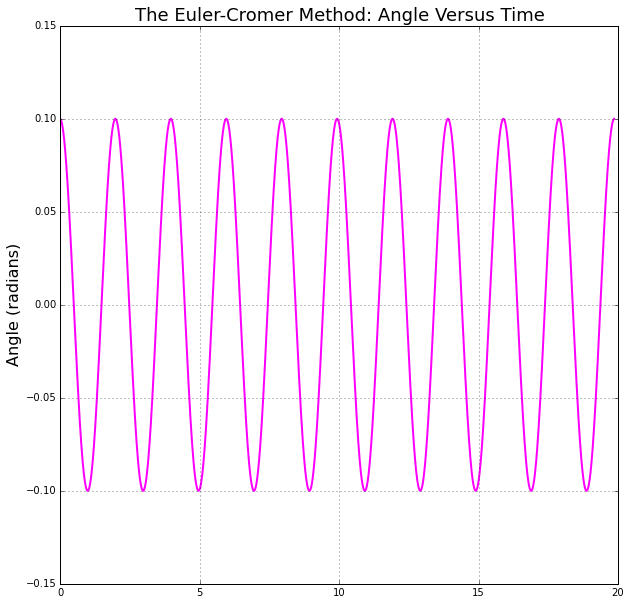

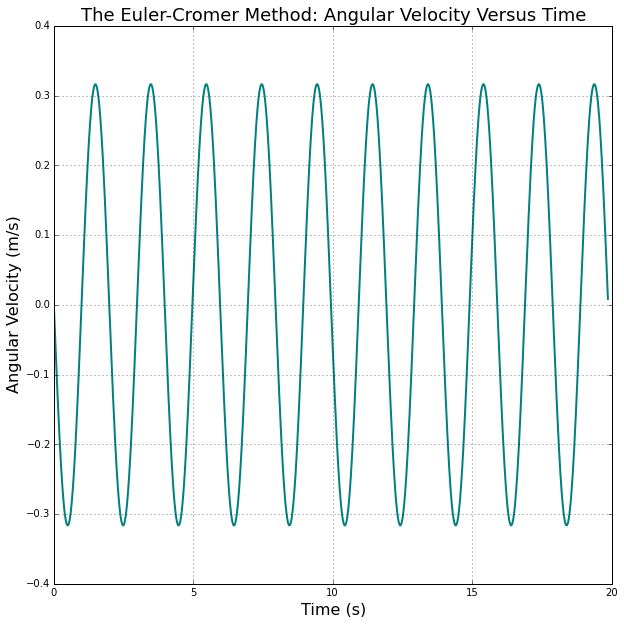

In [8]:
"""
I've changed the order of the commands and adjusted the angle function to receive the updated angular velocity.
Now that this rule is set and values are assigned I will plot the results.
"""

plt.figure(2)
plt.figure(figsize=(10,10))
plt.plot(t, angle_EC, color = 'magenta', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
plt.grid(True)

plt.figure(3)
plt.figure(figsize=(10,10))
plt.plot(t, angVel_EC, color = 'teal', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.show ()


This data seems much more consistent with reality. Momentum and energy appear to be conserved, as they should be in the case of an ideal pendulum where $\sum \vec F_{ext} \ = \ 0 $. 

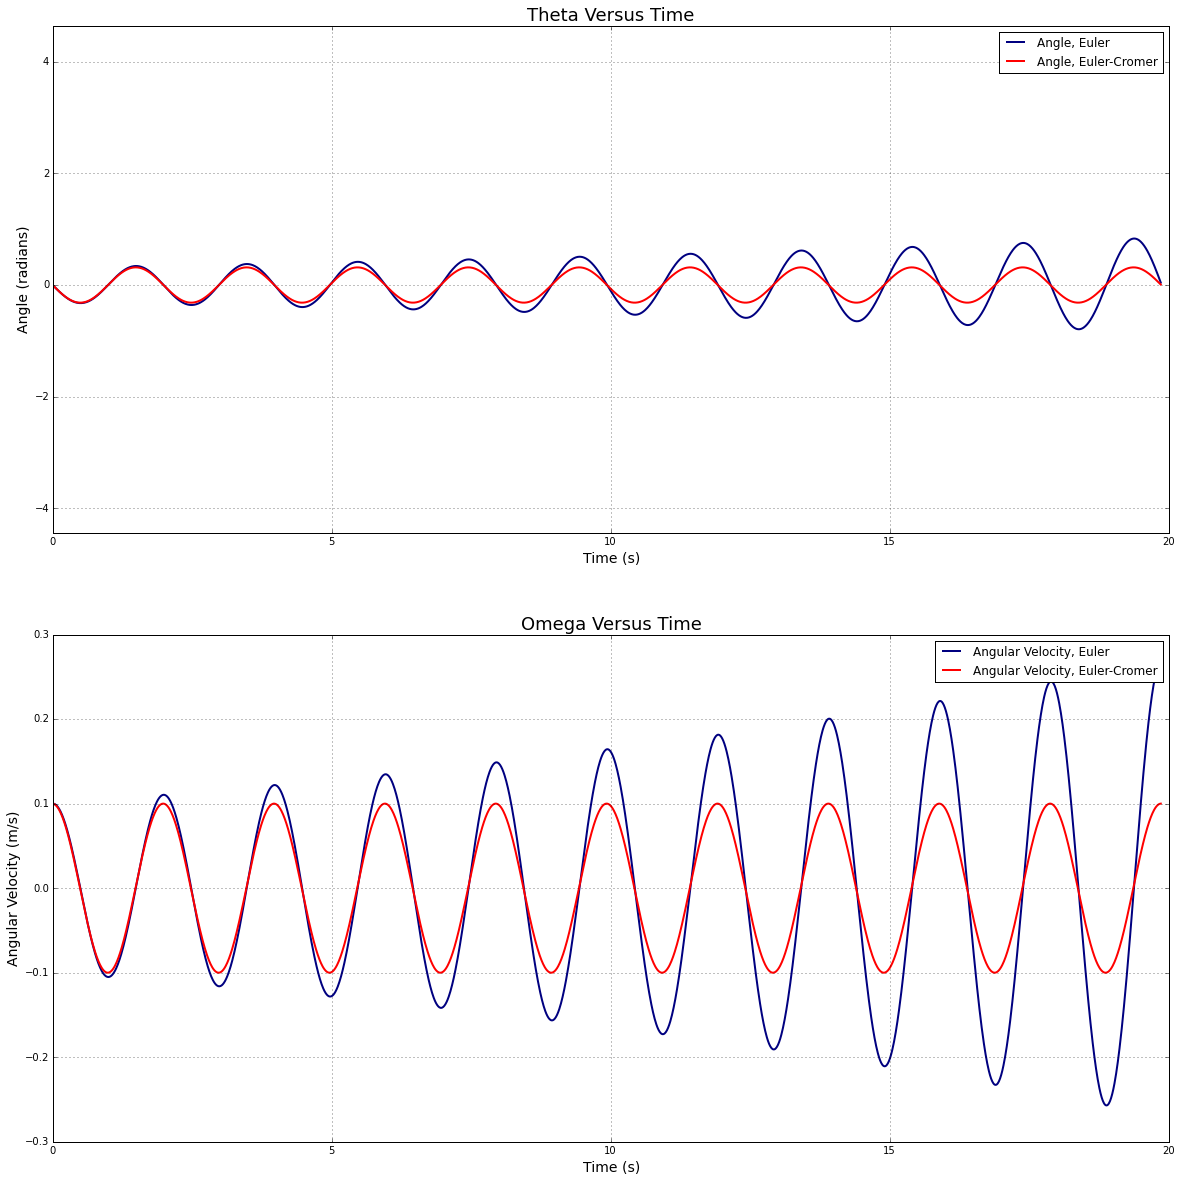

In [9]:

plt.figure(1)
plt.figure(figsize=(20,20))

plt.subplot(211)

thetaE, = plt.plot(t, angVel_E, color='navy', linewidth=2.0)
thetaEC, = plt.plot(t, angVel_EC, color='red', linewidth=2.0)

plt.axis('equal')

plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angle (radians)', fontsize=14)
plt.grid(True)
plt.title('Theta Versus Time', fontsize=18)
#plt.xlabel('Time (s)', size = '20')
plt.legend([thetaE, thetaEC], ["Angle, Euler", "Angle, Euler-Cromer "])


plt.figure(2)

plt.subplot(212)

omegaE, = plt.plot(t, angle_E, color='navy', linewidth=2.0)
omegaEC, = plt.plot(t, angle_EC, color='red', linewidth=2.0)

plt.legend([omegaE, omegaEC], ["Angular Velocity, Euler", "Angular Velocity, Euler-Cromer"])
plt.grid(True)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angular Velocity (m/s)', fontsize=14)
plt.title('Omega Versus Time', fontsize=18)


plt.show()


This graph really illustrates how the slight variation of simply feeding the function an ammended velocity can make a world of difference- by the end of this graph the intervals are completely out of phase and the potential for gross miscalculation is obvious. It is clearly important in the case of oscillation to use the Euler-Cromer method, feeding the angle step function the current index in the angular velocity array, as opposed to the previous value. But what about the energy of this pendulum?

In [10]:
theta = np.arange(0,(np.pi/2),dt)
m = 1.0
h = L*(1-np.cos(theta))
g = 10.0
u = np.zeros(len(t))
k = np.zeros(len(t))
e = np.zeros(len(t))

i = 0

def energy(angVel, angle, L, m, g, h):
    u = (m*g*(L*(1-np.cos(angle))))
    k = ((0.5)*m*(L*angVel)**2)
    e = u+k
    return u, k, e

"""
Now that I've defined a function to evaluate the energy and created an empty array to fill for each data set
I'll create a while loop so that I dont have to define the initial iterations of each energy array
in order for the sizes to be correct in this case, I need a range one less than ten times the period
and finally I will plot the results.
"""

while t[i]<(10*period-1):
    u[i], k[i], e[i] = energy(angVel_EC[i-1], angle_EC[i-1], L, m, g, h)
    if any(theta) ==(np.pi/2):
        u = m*g*L
        k = 0
        e = m*g*L
    i = i + 1

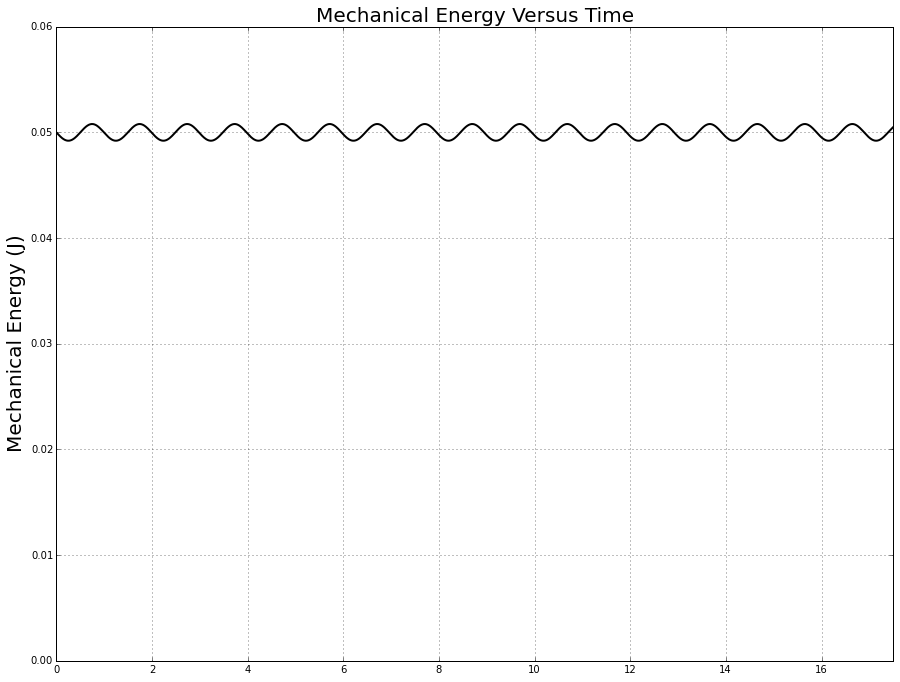

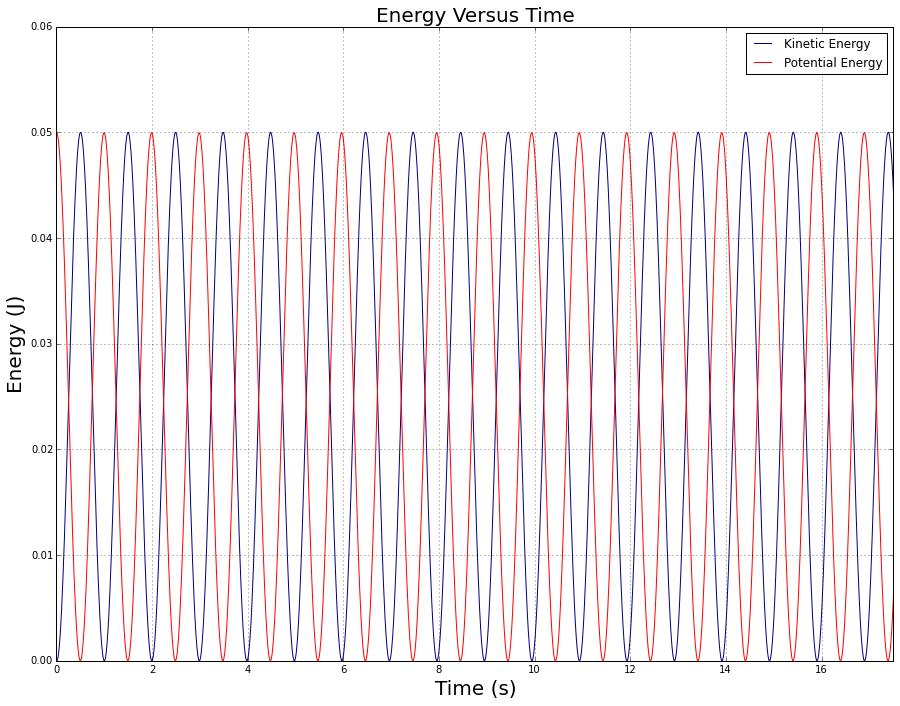

In [11]:
plt.figure(3)
plt.figure(figsize=(15,25))
plt.subplot(211)
plt.plot(t,e, color='black', linewidth=2.0)
plt.ylabel('Mechanical Energy (J)', size = '20')
plt.title('Mechanical Energy Versus Time', size = '20')
plt.axis([0, 17.5, 0, 0.06])
plt.grid(True)
plt.show()

plt.figure(4)
plt.figure(figsize=(15,25))
plt.subplot(212)
kinetic, = plt.plot(t, k, color='navy', linewidth=1.0)
potential, = plt.plot(t, u, color='red', linewidth=1.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time', size = '20')
plt.axis([0, 17.5, 0, 0.06])
plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential], ["Kinetic Energy", "Potential Energy"])
plt.grid(True)
plt.show()
